<a href="https://colab.research.google.com/github/adikulkarni11/Machine-Learning-Models/blob/main/Celeb_Face_Categorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aditya Kulkarni
## 04/26/20


The goal is to use 10,000 celebrity photos to train a classifier that can classify photos jointly using the following 4 labels:

young, attractive, smiling, and male.


I used 5000 photos for training, 2500 photos for validation and 2500 photos for testing.

We the photos before determine the training, validation and test sets.

Importing required Libraries:

In [ ]:
import pandas as pd
import io
from tensorflow import keras
import os
import random
import matplotlib
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt
np.random.seed(42)
%matplotlib inline

Extracting Images from Uploaded Zip file: (For colab)

In [ ]:
#!unzip images.zip

### Describing the Dataframe

Reading the List Attribute Celeb csv:

In [ ]:
train = pd.read_csv('list_attr_celeba.csv')
print(train)

          Filename  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                 0                1           1   
1       000002.jpg                 0                0           0   
2       000003.jpg                 0                0           0   
3       000004.jpg                 0                0           1   
4       000005.jpg                 0                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                 0                0           1   
202595  202596.jpg                 0                0           0   
202596  202597.jpg                 0                0           0   
202597  202598.jpg                 0                1           1   
202598  202599.jpg                 0                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                     0     0      0         0         0           0  ...   
1                

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
Filename               202599 non-null object
5_o_Clock_Shadow       202599 non-null int64
Arched_Eyebrows        202599 non-null int64
Attractive             202599 non-null int64
Bags_Under_Eyes        202599 non-null int64
Bald                   202599 non-null int64
Bangs                  202599 non-null int64
Big_Lips               202599 non-null int64
Big_Nose               202599 non-null int64
Black_Hair             202599 non-null int64
Blond_Hair             202599 non-null int64
Blurry                 202599 non-null int64
Brown_Hair             202599 non-null int64
Bushy_Eyebrows         202599 non-null int64
Chubby                 202599 non-null int64
Double_Chin            202599 non-null int64
Eyeglasses             202599 non-null int64
Goatee                 202599 non-null int64
Gray_Hair              202599 non-null int64
Heavy_Makeup           202599 non

All images given are already of same size with dimensions 218 X 178 pixels.

Also, all fields are numeric, non-null and have equal number of entries.

**Shape and Size of the Dataframe:**

In [ ]:
print(train.shape)

(202599, 41)


In [ ]:
print(train.size)

8306559


We only require first 10000 of these. As only first 1000 images are given in images.zip.

In [ ]:
train.describe()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,0.111136,0.266981,0.512505,0.204572,0.022443,0.151575,0.240796,0.234532,0.239251,0.147992,...,0.056511,0.48208,0.208402,0.319567,0.188925,0.048460,0.472436,0.122967,0.072715,0.773617
std,0.314301,0.442383,0.499845,0.403389,0.148121,0.358610,0.427568,0.423707,0.426627,0.355093,...,0.230906,0.49968,0.406167,0.466310,0.391450,0.214737,0.499241,0.328400,0.259669,0.418491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.head()

,Filename,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
train[['Young', 'Smiling', 'Attractive', 'Male']][:10000]
# This is what we want to process on!

,Young,Smiling,Attractive,Male
0,1,1,1,0
1,1,1,0,0
2,1,0,0,1
3,1,0,1,0
4,1,0,1,0
...,...,...,...,...
9995,1,0,1,0
9996,1,1,1,1
9997,1,0,1,0
9998,1,0,1,0


In [ ]:
train['Filename'].values

array(['000001.jpg', '000002.jpg', '000003.jpg', ..., '202597.jpg',
       '202598.jpg', '202599.jpg'], dtype=object)

In [ ]:
req_list = ["Male", "Smiling","Attractive", "Young"]
for i in req_list:
  print(i," : ",train[i][:10000].mean(),",",train[i][10000:].mean() )

Male  :  0.4217 , 0.41649748960274974
Smiling  :  0.4822 , 0.48207415407141263
Attractive  :  0.5115 , 0.5125571783861806
Young  :  0.7771 , 0.7734359991484898


**Reading the Training Images:**

In [ ]:
# Professer Wei gave idea of this!
root = r'images/images'
X = np.zeros((10000, 218, 178, 3))
for i in range(10000):
  image_path = os.path.join(root, train["Filename"][i])
  img = load_img(image_path)
  img = img_to_array(img)
  X[i] = img

print(X.shape)

(10000, 218, 178, 3)


In [ ]:
num_labels = len(req_list)
y = np.zeros((10000, num_labels)).astype("uint8")

In [ ]:
y.shape

(10000, 4)

**Storing Images in placeholders:**

In [ ]:
for j in range(10000):
  y[j][0] = train[req_list[0]][j]
  y[j][1] = train[req_list[1]][j]
  y[j][2] = train[req_list[2]][j]
  y[j][3] = train[req_list[3]][j]

In [ ]:
print(y)

[[0 1 1 1]
 [0 1 0 1]
 [1 0 0 1]
 ...
 [0 0 1 1]
 [0 0 1 1]
 [0 1 1 1]]


In [ ]:
values = np.arange(X.shape[0])



In [ ]:
np.random.shuffle(values)

In [ ]:
X = X[values]
y = y[values]


In [ ]:
# need pixels
X = X/255.0

In [ ]:
list =  ["Male", "Smiling","Attractive", "Young"]

In [ ]:
y[2]

array([0, 1, 1, 1], dtype=uint8)

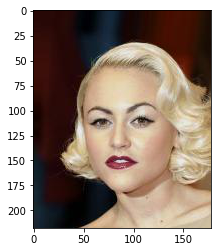

In [ ]:
img = X[2].reshape(218,178,3)
plt.imshow(img)

The above image is correctly depicted as non-male, smiling, attractive and young.

In [ ]:
y[25]

array([1, 0, 0, 0], dtype=uint8)

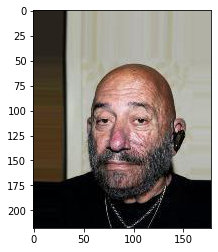

In [ ]:
img = X[25].reshape(218,178,3)
plt.imshow(img)

The above image is correctly depicted as male, non-smiling, not attractive and not young.

We observe the correlation between the image and y from the two above examples. Thus I can conclude that the data has been acquired and X and y have been created correctly.

**Creating Train, Test and Valuation Sets:**

In [ ]:
X_train = X[:10000//2]
X_val = X[10000//2:10000*3//4]
X_test = X[10000*3//4:]


In [ ]:

y_train = y[:10000//2]
y_test = y[10000*3//4:]
y_val = y[10000//2:10000*3//4]


In [ ]:
X_train.shape, X_test.shape, X_val.shape

((5000, 218, 178, 3), (2500, 218, 178, 3), (2500, 218, 178, 3))

In [ ]:
y_train.shape, y_test.shape, y_val.shape

((5000, 4), (2500, 4), (2500, 4))

### Creating the Model

**Defining a convnet that includes dropout:**

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(218, 178, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  #Dropout improves efficiency of Neural Network by throwing some neurons
model.add(layers.Dense(4,activation = 'sigmoid')) #Very important 4 output classes

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 216, 176, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 88, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 86, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 18, 128)       1

**Compiling the model:**

In [ ]:
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['acc'])


In [ ]:
history = model.fit(X_train, y_train, epochs = 1000, validation_data = (X_val,y_val), shuffle = True, callbacks = [keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Train on 5000 samples, validate on 2500 samples
Epoch 1/1000
5000/5000 [==============================] - 310s 62ms/sample - loss: 0.6527 - acc: 0.6014 - val_loss: 0.6213 - val_acc: 0.6460
Epoch 2/1000
5000/5000 [==============================] - 283s 57ms/sample - loss: 0.6057 - acc: 0.6690 - val_loss: 0.5680 - val_acc: 0.7215
Epoch 3/1000
5000/5000 [==============================] - 279s 56ms/sample - loss: 0.5233 - acc: 0.7383 - val_loss: 0.4548 - val_acc: 0.7968
Epoch 4/1000
5000/5000 [==============================] - 305s 61ms/sample - loss: 0.4500 - acc: 0.7941 - val_loss: 0.4020 - val_acc: 0.8203
Epoch 5/1000
5000/5000 [==============================] - 306s 61ms/sample - loss: 0.4109 - acc: 0.8156 - val_loss: 0.3745 - val_acc: 0.8321
Epoch 6/1000
5000/5000 [==============================] - 286s 57ms/sample - loss: 0.3811 - acc: 0.8278 - val_loss: 0.3460 - val_acc: 0.8488
Epoch 7/1000
5000/5000 [==============================] - 280s 56ms/sample - loss: 0.3592 - acc: 0.8407 - 

**Graphing the training and validation accuracy:**

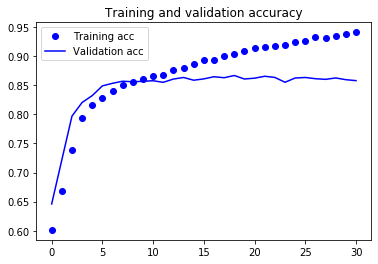

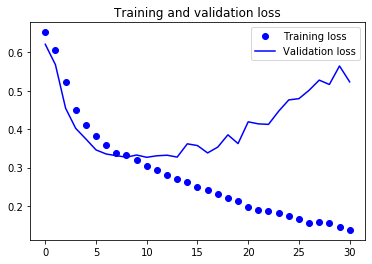

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Good practice to save model
model.save('celeb_1.h5')

**Evaluating the model using the seperated test set:**

In [ ]:
model.evaluate(X_test,y_test)

2500/2500 [==============================] - 45s 18ms/sample - loss: 0.3283 - acc: 0.8562


[0.32833751134872435, 0.8562]

I observe a **~86%** accuracy with the test set which is very good.

In [ ]:
model.predict(X_test[20:25])

array([[9.9394518e-01, 9.8274082e-01, 6.0887772e-01, 7.8837025e-01],
       [9.0271622e-01, 8.8254514e-05, 1.6129990e-01, 8.7675256e-01],
       [7.0288911e-04, 7.2125435e-02, 6.0307246e-01, 9.2600030e-01],
       [9.9839169e-01, 1.2864485e-02, 6.3757110e-01, 9.6826386e-01],
       [6.8064787e-06, 9.9995422e-01, 8.9946389e-01, 9.4650567e-01]],
      dtype=float32)

In [ ]:
prediction = model.predict(X_test)

**Checking only the most accurate predictions (above 91%):**

In [ ]:
acc_results = prediction > 0.91

In [ ]:
acc_results

array([[False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       ...,
       [False, False, False,  True],
       [ True, False, False, False],
       [False, False, False, False]])

In [ ]:
print(acc_results.shape[0])

2500


In [ ]:
shape_res = acc_results.shape[0]

Checking for images above 90%

In [ ]:
acc_results = prediction > 0.90


#Checking images that safisty requirement

for i in range(2500):
    if acc_results[i].all():
        path = os.path.join(root,train['Filename'][values[10000*3//4 + i]])
        img = load_img(path)

        plt.imshow(img)
        plt.show()
        plt.figure()
        print(path)


We observe that the model does not predict anything with more than 90% accuracy.

**Checking images that safisty requirement of 85%**

    

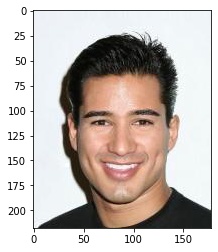

images/images\000214.jpg


<Figure size 432x288 with 0 Axes>

In [ ]:
acc_results = prediction > 0.85


#Checking images that safisty requirement

    



for i in range(2500):
    if acc_results[i].all():
        path = os.path.join(root,train['Filename'][values[10000*3//4 + i]])
        img = load_img(path)

        plt.imshow(img)
        plt.show()
        plt.figure()
        print(path)


**Checking for predictions above 80%**

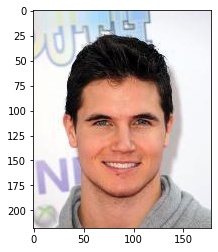

images/images\004931.jpg


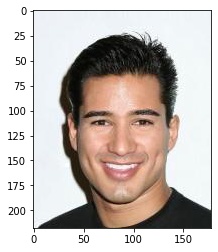

images/images\000214.jpg


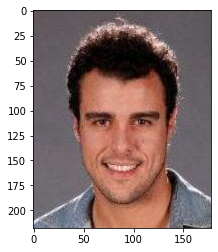

images/images\007879.jpg


<Figure size 432x288 with 0 Axes>

In [ ]:
acc_results = prediction > 0.80


#Checking images that safisty requirement

for i in range(2500):
    if acc_results[i].all():
        path = os.path.join(root,train['Filename'][values[10000*3//4 + i]])
        img = load_img(path)

        plt.imshow(img)
        plt.show()
        plt.figure()
        print(path)


We observe more images fall in the 80% - 85% catergory.

---